In [1]:
%matplotlib inline

In [3]:
from matplotlib.pyplot import imshow

In [4]:
import mnist_loader

In [5]:
train_data, valid_data, test_data = mnist_loader.load_data()

In [6]:
print train_data[1][0]

5


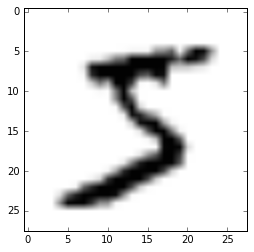

In [10]:
imshow(train_data[0][0, :].reshape([28,28]), cmap="Greys")

In [11]:
training_data, validation_data, testing_data = mnist_loader.load_data_wrapper()

In [15]:
train_data[0][0, :].reshape((784, 1)).shape

(784, 1)

In [16]:
import network

In [17]:
mnist_nn = network.Network([784, 23, 10])  # with 23 hidden neurons. 

In [18]:
# try stochastic gradient descent
mnist_nn.SGD(training_data, epochs=30, mini_batch_size=10, eta=3.0, test_data=testing_data)

Epoch 0: 9092 / 10000
Epoch 1: 9201 / 10000
Epoch 2: 9278 / 10000
Epoch 3: 9315 / 10000
Epoch 4: 9313 / 10000
Epoch 5: 9357 / 10000
Epoch 6: 9389 / 10000
Epoch 7: 9395 / 10000
Epoch 8: 9373 / 10000
Epoch 9: 9383 / 10000
Epoch 10: 9406 / 10000
Epoch 11: 9391 / 10000
Epoch 12: 9389 / 10000
Epoch 13: 9414 / 10000
Epoch 14: 9397 / 10000
Epoch 15: 9428 / 10000
Epoch 16: 9419 / 10000
Epoch 17: 9417 / 10000
Epoch 18: 9384 / 10000
Epoch 19: 9417 / 10000
Epoch 20: 9442 / 10000
Epoch 21: 9404 / 10000
Epoch 22: 9422 / 10000
Epoch 23: 9451 / 10000
Epoch 24: 9459 / 10000
Epoch 25: 9426 / 10000
Epoch 26: 9442 / 10000
Epoch 27: 9424 / 10000
Epoch 28: 9440 / 10000
Epoch 29: 9443 / 10000


In [19]:
mnist_nn_hl_100 = network.Network([784, 100, 10])

In [20]:
mnist_nn_hl_100.SGD(training_data=training_data, epochs=100, mini_batch_size=10, eta=3.0, test_data=testing_data)

Epoch 0: 7356 / 10000
Epoch 1: 7530 / 10000
Epoch 2: 7570 / 10000
Epoch 3: 7586 / 10000
Epoch 4: 7788 / 10000
Epoch 5: 8411 / 10000
Epoch 6: 8405 / 10000
Epoch 7: 8452 / 10000
Epoch 8: 8487 / 10000
Epoch 9: 8498 / 10000
Epoch 10: 8518 / 10000
Epoch 11: 8523 / 10000
Epoch 12: 8508 / 10000
Epoch 13: 8522 / 10000
Epoch 14: 8515 / 10000
Epoch 15: 8541 / 10000
Epoch 16: 8527 / 10000
Epoch 17: 8525 / 10000
Epoch 18: 8519 / 10000
Epoch 19: 8536 / 10000
Epoch 20: 8544 / 10000
Epoch 21: 8525 / 10000
Epoch 22: 8545 / 10000
Epoch 23: 8548 / 10000
Epoch 24: 8541 / 10000
Epoch 25: 8547 / 10000
Epoch 26: 8546 / 10000
Epoch 27: 8558 / 10000
Epoch 28: 8552 / 10000
Epoch 29: 8553 / 10000
Epoch 30: 8558 / 10000
Epoch 31: 8561 / 10000
Epoch 32: 8556 / 10000
Epoch 33: 8555 / 10000
Epoch 34: 8557 / 10000
Epoch 35: 8564 / 10000
Epoch 36: 8552 / 10000
Epoch 37: 8555 / 10000
Epoch 38: 8555 / 10000
Epoch 39: 8558 / 10000
Epoch 40: 8552 / 10000
Epoch 41: 8553 / 10000
Epoch 42: 8548 / 10000
Epoch 43: 8551 / 1000

In [30]:
# choose best learning rate, decide fall down slowly or quickly
eta_list = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]  # group by twice, according UoW
best_result_eta = [0.0, 0.0]
for eta in eta_list:
    print ">"*8, " Using eta=%f " % eta, "<"*8
    temp_nn = network.Network([784, 30, 10])
    temp_nn.SGD(training_data, epochs=30, mini_batch_size=10, eta=eta)
    accuracy = temp_nn.evaluate(testing_data) / (test_data[0].shape[0] * 1.0)
    if accuracy > best_result_eta[0]:
        best_result_eta[0] = accuracy
        best_result_eta[1] = eta
print "With using eta=%f, you can get best performance accuracy=%f" % (best_result_eta[0], best_result_eta[1])


>>>>>>>>  Using eta=0.010000  <<<<<<<<
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
>>>>>>>>  Using eta=0.030000  <<<<<<<<
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 

In [31]:
# Exercise try no hidden layer
mnist_nn_no_hidden = network.Network([784, 10])
mnist_nn_no_hidden.SGD(training_data, epochs=100, eta=3.0, mini_batch_size=10, test_data=testing_data)

Epoch 0: 5780 / 10000
Epoch 1: 7977 / 10000
Epoch 2: 8960 / 10000
Epoch 3: 9077 / 10000
Epoch 4: 9107 / 10000
Epoch 5: 9105 / 10000
Epoch 6: 9050 / 10000
Epoch 7: 9143 / 10000
Epoch 8: 9121 / 10000
Epoch 9: 9097 / 10000
Epoch 10: 9118 / 10000
Epoch 11: 9129 / 10000
Epoch 12: 9100 / 10000
Epoch 13: 9152 / 10000
Epoch 14: 9140 / 10000
Epoch 15: 9145 / 10000
Epoch 16: 9146 / 10000
Epoch 17: 9128 / 10000


KeyboardInterrupt: 

In [32]:
%run mnist_svm.py

Baseline classifier using an SVM.
9435 of 10000 values correct.
